# Import the dependencies

In [1]:
import os
from miezepy.mieze import Mieze
from pprint import pprint
import sys 
print(sys.version)

'''
###########################################################
The manager is the instance linking the following parts:
- I/O manager for input output
- The processing of data 
- The fitting of data (maybe merge processing and fitting)
- The graphical manopulation of reduced and fitted data
###########################################################
'''
tool = Mieze()



3.7.0 (default, Aug 20 2018, 21:19:42) 
[Clang 9.1.0 (clang-902.0.39.2)]


# Process the elastic data

## First set up the environnement

In [2]:
'''
###########################################################
INITIALISE THE ENVIRONEMENT:

Each dataset is initialised in a new environement. We
therefore initialise a new environement through the manager
run command with the keyword 'new environement'. The
title and selected type are optional and will fall back to 
'No_title' and 'MIEZE' if not provided.

###########################################################
'''
elastic_env = tool.new_environment(title = 'elastic', select = 'SANS')


## Load the data

In [3]:
'''
###########################################################
LOAD THE DATA:

at a further point in time different routines will be 
provided to load data. The current way of proceedign is to 
load a file containing all relevant information and let the
routine parse the content. 
###########################################################
'''
elastic_env.io.load_SANS_PAD('SkX_down.txt')
elastic_env.process.extract_from_metadata(axis = 'Temperature', key = 'T_B')
print(elastic_env.current_data)

=========== This is the Input ============

['Data', "['110_1']", '0012', 'range(2194, 2298)', '(128x128)']
['Data', "['100_1']", '0012', 'range(2681, 2725)', '(128x128)']
['Data', "['100_2']", '0012', 'range(2890, 2956)', '(128x128)']
['Data', "['BG']", '0012', 'range(1609, 1611)', '(128x128)']

##########################################################
################## DATA STRUCTURE ########################
##########################################################
The datastructure currently consists of:
- Number of elements: 108
- Number of dimensions: 2
- The axes names are: ['Type', 'Temperature']
- The axes units are: ['-', 'K']
- The axes lengths are: [4, 106]
- The base structure is: np
- The base structure dim is: (128, 128)
- The metadata addition is set to: True
----------------------------------------------------------
Creation date: Wed Jan 23 17:31:18 2019
Source format: PAD files
Measurement type: SANS
##########################################################




## Create a Mask and process intensities

In [4]:
'''
###########################################################
SET THE MASK:

A large variety of masks are available to be edited. Using
the 'set mask template' keyword it is possible to set a 
predefined mask. Further implementations will allow the 
change of the default mask parameters and at some point the 
loading of custome masks from file.
###########################################################
'''
elastic_env.mask.setMask('SkX_peak_SkXCon')
elastic_env.process.calculate_intensity()
elastic_result_1 = elastic_env.get_result(name = 'Intensity')

elastic_env.mask.setMask('SkX_peak_Sixfold')
elastic_env.process.calculate_intensity()
elastic_result_2 = elastic_env.get_result(name = 'Intensity')


# Vertical data

## Create environement and load data

In [5]:
vertical_env = tool.new_environment(title = 'vertical MIEZE', select = 'MIEZE')
vertical_env.io.load_MIEZE_TOF('LoadSkXCon.txt')
print(vertical_env.current_data)

=========== This is the Input ============

['Data', '[28.40,0]', '0012', 'range(2727, 2736)', '(8x16x128x128)']
['Data', '[62.00,0]', '0012', '[2736]+[i for i in range(2739, 2747)]', '(8x16x128x128)']
['Data', '[28.60,0]', '0012', 'range(2747, 2756)', '(8x16x128x128)']
['Data', '[28.80,0]', '0012', 'range(2813, 2822)', '(8x16x128x128)']
['Data', '[28.95,0]', '0012', 'range(2774, 2783)', '(8x16x128x128)']
['Data', '[29.05,0]', '0012', 'range(2804, 2813)', '(8x16x128x128)']
['Data', '[29.15,0]', '0012', 'range(2765, 2774)', '(8x16x128x128)']
['Data', '[29.25,0]', '0012', 'range(2858, 2867)', '(8x16x128x128)']
['Data', '[29.35,0]', '0012', 'range(2756, 2765)', '(8x16x128x128)']
['Data', '[29.45,0]', '0012', 'range(2849, 2858)', '(8x16x128x128)']
['Data', '[29.60,0]', '0012', 'range(2792, 2801)', '(8x16x128x128)']
['Data', '[29.75,0]', '0012', 'range(2783, 2792)', '(8x16x128x128)']
['Data', '[30.50,0]', '0012', 'range(2840, 2849)', '(8x16x128x128)']

######################################

## Set the mask

In [6]:
vertical_env.mask.mask_dict['Pre_SkX_peak_SkXCon_2'] = [["radial_comp", [20, 14], 12, 3, 3, [69, 82], [80, 104], ["arc", [0, 0], 0, [0, 10], [0, 10], [True, True, False]]]]
vertical_env.mask.setMask('Pre_SkX_peak_SkXCon_2')
print(vertical_env.mask)

############################
Mask name: Pre_SkX_peak_SkXCon_2
[["radial_comp", [20, 14], 12, 3, 3, [69, 82], [80, 104], ["arc", [0, 0], 0, [0, 10], [0, 10], [true, true, false]]]]
############################



## Set the fitting parameters

In [7]:
'''
###########################################################
SET THE FITING PARAMETERS:

Each fit class has anumber of fit parameters that can be 
set. This is doen in the following. 
###########################################################
'''
#Set the foils (edit in GUI)
foils_in_echo = []
foils_in_echo.append([1, 1, 1, 1, 1, 1])
foils_in_echo.append([1, 1, 1, 1, 1, 1])
foils_in_echo.append([1, 1, 1, 1, 1, 1])
foils_in_echo.append([1, 1, 1, 1, 1, 1])
foils_in_echo.append([1, 1, 1, 1, 1, 1])
foils_in_echo.append([1, 1, 1, 1, 1, 1])
foils_in_echo.append([1, 1, 1, 1, 1, 1])
foils_in_echo.append([0, 0, 0, 0, 1, 0])
foils_in_echo.append([0, 0, 0, 0, 1, 0])

#Set the selected (edit in GUI)
Selected = [ 28.4, 28.6, 28.8, 28.95, 29.05, 29.15, 29.25, 29.35, 29.45, 29.6, 29.75]

#Set the background (edit in GUI)
Background = 62
#Set the reference (edit in GUI)
Reference = [28.6,0]


vertical_env.fit.set_parameter( name = 'Select',        value = Selected     )
vertical_env.fit.set_parameter( name = 'Reference',     value = Reference    )
vertical_env.fit.set_parameter( name = 'Background',    value = Background   )
vertical_env.fit.set_parameter( name = 'foils_in_echo', value = foils_in_echo)


## Process throught the fitting steps

In [8]:
'''
###########################################################
PROCESS THE DATA:


The process class maanges the workflows as no fit class
funciton should be called dierectly. All results will be 
put into the result class and logs into the log class
linked to the result. 
###########################################################
'''
vertical_env.process.calculate_echo()
vertical_env.process.remove_foils()
vertical_env.process.calculate_shift()

Processing shift for 28.4 K
Processing shift for 28.6 K
Processing shift for 28.95 K
Processing shift for 29.15 K
Processing shift for 29.25 K
Processing shift for 29.35 K
Processing shift for 29.45 K
Processing shift for 29.6 K
Processing shift for 29.75 K
Processing shift for 30.5 K
Processing shift for 28.8 K
Processing shift for 29.05 K
Processing shift for 62.0 K


In [9]:
vertical_env.mask.setMask('SkX_peak_SkXCon')
print(vertical_env.mask)

############################
Mask name: SkX_peak_SkXCon
[["arc", [28, 34], 0, [65, 85], [82, 100]]]
############################



In [10]:
vertical_env.process.calculate_ref_contrast()
vertical_env.process.calculate_contrast()
vert_result = vertical_env.get_result(name = 'Contrast fit')


Processing the reference contrast calculation for: [28.6, 0]
Processing the contrast fit for: 28.6 measurement 0.0
Processing the contrast fit for: 28.4 measurement 0.0
Processing the contrast fit for: 28.6 measurement 0.0
Processing the contrast fit for: 28.8 measurement 0.0
Processing the contrast fit for: 28.95 measurement 0.0
Processing the contrast fit for: 29.05 measurement 0.0
Processing the contrast fit for: 29.15 measurement 0.0
Processing the contrast fit for: 29.25 measurement 0.0
Processing the contrast fit for: 29.35 measurement 0.0
Processing the contrast fit for: 29.45 measurement 0.0
Processing the contrast fit for: 29.6 measurement 0.0
Processing the contrast fit for: 29.75 measurement 0.0
Processing the Background contrast calculation for: 62
Processing the contrast fit for: 62 measurement 0.0
Processing the contrast calculation for: 28.4
Processing the contrast calculation for: 28.6
Processing the contrast calculation for: 28.8
Processing the contrast calculation for

In [11]:
# vert_result.log.dump_to_file('result.txt')
vert_result.log.dump_to_console()

2019-01-23 17:31:40.946019 INFORMATION Added the entry'Date' to the metadata
2019-01-23 17:31:40.946021 INFORMATION Added the entry'Start' to the metadata
2019-01-23 17:31:40.946022 INFORMATION Added the entry'name' to the metadata
2019-01-23 17:31:40.959295 INFORMATION Added the entry'Gamma' to the results
2019-01-23 17:31:40.959300 INFORMATION Added the entry'Gamma_error' to the results
2019-01-23 17:31:40.959302 INFORMATION Added the entry'Curve' to the results
2019-01-23 17:31:40.959303 INFORMATION Added the entry'Curve Axis' to the results
2019-01-23 17:31:40.959305 INFORMATION Added the entry'Parameters' to the results
2019-01-23 17:31:40.959306 INFORMATION Added the entry'Select' to the results
2019-01-23 17:31:40.959308 INFORMATION Added the entry'BG' to the results
2019-01-23 17:31:40.959309 INFORMATION Added the entry'Reference' to the results
2019-01-23 17:31:40.959310 INFORMATION Added the entry'Axis' to the results
2019-01-23 17:31:40.959312 INFORMATION Added the entry'Axi

# Parallel Data

In [12]:
parallel_env = tool.new_environment(title = 'parallel MIEZE', select = 'MIEZE')
parallel_env.io.load_MIEZE_TOF('SkXSixfold.txt')
print(parallel_env.current_data)


=========== This is the Input ============

['Data', '[68.00,0]', '0012', 'range(2186, 2194)', '(8x16x128x128)']
['Data', '[31.00,0]', '0012', 'range(2387, 2395)', '(8x16x128x128)']
['Data', '[30.00,0]', '0012', '[2396, 2398, 2401, 2402, 2403]', '(8x16x128x128)']
['Data', '[30.00,1]', '0012', '[2408, 2409, 2410]', '(8x16x128x128)']
['Data', '[29.80,0]', '0012', '[2412, 2413, 2374, 2375, 2376, 2377, 2378, 2379]', '(8x16x128x128)']
['Data', '[29.60,0]', '0012', '[2320, 2321, 2414, 2323, 2415, 2325, 2326, 2327]', '(8x16x128x128)']
['Data', '[29.40,0]', '0012', 'range(2334, 2342)', '(8x16x128x128)']
['Data', '[29.20,0]', '0012', '[2348, 2349, 2350, 2351, 2352, 2353, 2354]', '(8x16x128x128)']
['Data', '[29.20,1]', '0012', '[2416]', '(8x16x128x128)']
['Data', '[29.10,0]', '0012', 'range(2418, 2426)', '(8x16x128x128)']
['Data', '[29.00,0]', '0012', '[2362, 2363, 2364, 2365, 2366, 2426, 2368, 2369]', '(8x16x128x128)']
['Data', '[28.60,0]', '0012', 'range(2434, 2442)', '(8x16x128x128)']
['Data'

In [13]:
parallel_env.mask.setMask('Pre_SkX_peak_Sixfold')
parallel_env.mask.addCommand(command_str = 'mask.real[abs(mask.real) > 8] = 0')
#parallel_env.mask.set_parameters([[28,34], 90, 45,[17, 56],15,13])
print(parallel_env.mask)


############################
Mask name: Pre_SkX_peak_Sixfold
[["radial_comp", [43, 40], -21, 3, 3, [45, 69], [39, 58], ["arc", [0, 0], 0, [0, 10], [0, 10], [true, true, false]]]]
############################



## Set fit parameters

In [14]:
############################################
#initialize them
foils_in_echo = []
for i in range(4):
    foils_in_echo.append([1,1,1,1,1,1])
foils_in_echo.append([1,1,0,1,1,1])
foils_in_echo.append([1,1,0,1,1,1])
foils_in_echo.append([0,0,0,0,1,0])
foils_in_echo.append([0,0,0,0,1,0])


#set the values to be processed as data
Select = [ 28.6, 29.0, 29.1, 29.2, 29.4, 29.6, 29.8, 30.0]

#set the reference value
Reference = [28.6,0]

#set the background
Background = 68.0

parallel_env.fit.set_parameter( name = 'Select',        value = Select       )
parallel_env.fit.set_parameter( name = 'Reference',     value = Reference    )
parallel_env.fit.set_parameter( name = 'Background',    value = Background   )
parallel_env.fit.set_parameter( name = 'foils_in_echo', value = foils_in_echo)

parallel_env.process.calculate_echo()
parallel_env.process.remove_foils()
parallel_env.process.calculate_shift()

Processing shift for 68.0 K
Processing shift for 28.4 K
Processing shift for 29.8 K
Processing shift for 29.4 K
Processing shift for 29.2 K
Processing shift for 29.2 K
Processing shift for 29.1 K
Processing shift for 29.0 K
Processing shift for 28.6 K
Processing shift for 29.6 K
Processing shift for 30.0 K
Processing shift for 30.0 K
Processing shift for 31.0 K


## Process to fit the data

In [15]:
parallel_env.mask.setMask('SkX_peak_Sixfold')
print(parallel_env.mask)

parallel_env.process.calculate_ref_contrast()

#coorect values
parallel_env.results.set_result( 
         name = 'Reference contrast calculation', 
         position = ['Contrast_ref',0.36585973199337996], 
         value = 0.73)

parallel_env.results.set_result(
         name = 'Reference contrast calculation', 
         position = ['Contrast_ref_error',0.36585973199337996], 
         value = 0.0035)

parallel_env.process.calculate_contrast()
parallel_result = parallel_env.get_result(name = 'Contrast fit')


############################
Mask name: SkX_peak_Sixfold
[["arc", [27, 33], 0, [47, 90], [15, 52]]]
############################

Processing the reference contrast calculation for: [28.6, 0]
Processing the contrast fit for: 28.6 measurement 0.0
Processing the contrast fit for: 28.6 measurement 0.0
Processing the contrast fit for: 29.0 measurement 0.0
Processing the contrast fit for: 29.1 measurement 0.0
Processing the contrast fit for: 29.2 measurement 0.0
Processing the contrast fit for: 29.2 measurement 1.0
Processing the contrast fit for: 29.4 measurement 0.0
Processing the contrast fit for: 29.6 measurement 0.0
Processing the contrast fit for: 29.8 measurement 0.0
Processing the contrast fit for: 30.0 measurement 0.0
Processing the contrast fit for: 30.0 measurement 1.0
Processing the Background contrast calculation for: 68.0
Processing the contrast fit for: 68.0 measurement 0.0
Processing the contrast calculation for: 28.6
Processing the contrast calculation for: 29.0
Processing t

# Plot perp data

No handles with labels found to put in legend.


[9.82102475e-05 9.03035645e-05 1.08338058e-04 1.00944553e-04
 1.69793613e-04 2.80027401e-03 1.43889909e-02 1.35404492e-02
 9.58845270e-03 3.41989164e-03 2.83053173e-04 1.70741260e-04
 1.58362142e-04 1.55774525e-04 1.38898535e-04 1.19751353e-04
 1.13287537e-04 1.19897106e-04 1.00467251e-04 1.10142687e-04
 1.00294941e-04 8.52722716e-05]


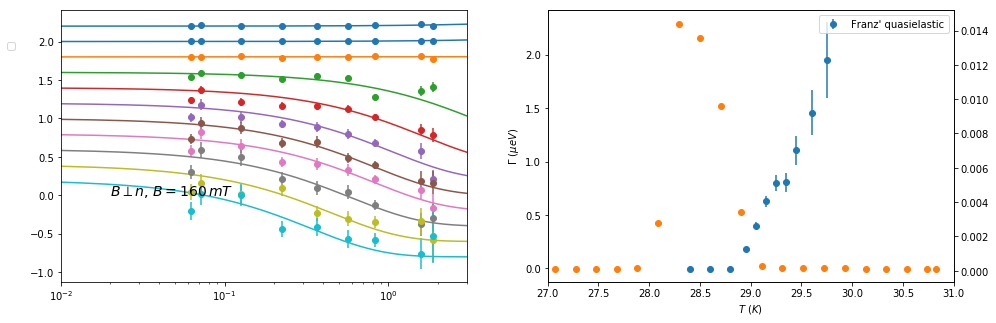

In [16]:
############################################
#see what hapens
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.constants as co
from matplotlib.colors import Colormap, LogNorm
from matplotlib.cm import get_cmap
import pandas as pd
%matplotlib inline
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)

Ts = []
Gammas = []
Gammaerrs = []

index = 0
def get_color(n, number_of_colors, cmapstr):

    cmap = get_cmap(cmapstr)

    return cmap(float(n)/number_of_colors)

for T in vert_result['Select']:
    x           = vert_result['Parameters'][T]['x']
    y           = vert_result['Parameters'][T]['y']
    y_error     = vert_result['Parameters'][T]['y_error']

    c = get_color(index,11,'tab10')
    ax.errorbar(
        x, 
        y+1.2-index*0.2,
        y_error, 
        fmt='o', 
        color=c)
        #label='$T=%.2f\,K$' %SkXCon[T].T_B)
    x = np.linspace(0.01,3,1000)

    ax.plot(x, vert_result['Curve'][T]+1.2-index*0.2, color=c)
    
    index += 1


ax.set_xscale('log')
ax.set_xlim(0.01,3)
ax.legend(bbox_to_anchor=(-0.1,0.9))
ax.text(2e-2, 0, r'$B \perp n$, $B=160\,mT$', fontsize=14)


ax1 = fig.add_subplot(1,2,2)
c = get_color(0,10,'tab10')
ax1.errorbar(
    vert_result['Select'],
    vert_result['Gamma'],
    vert_result['Gamma_error'],
    fmt='o', color=c, label='Franz\' quasielastic')

ax1.set_ylabel(r'$\Gamma\ (\mu eV)$')
ax1.set_xlabel(r'$T\ (K)$')
ax1.set_xlim(27,31)
ax1.legend()

ax2 = ax1.twinx()
c = get_color(1, 10, 'tab10')
ax2.errorbar(
    elastic_result_1['Axis']['100_1'],
    elastic_result_1['Intensity']['100_1'],
    yerr=elastic_result_1['Intensity_error']['100_1'],
    fmt='o', color=c, label='Franz\' elastic')

print(elastic_result_1['Intensity']['100_1'])
#load Jonas' data
#Jdata = pd.read_csv('/Users/alexanderschober/Downloads/Data_analysis_Schober/201806_RESEDA/data/Kindervater_Bvertn_quasielastic', skiprows=6, names=['T1', 'Gamma'])
#c = get_color(0, 10, 'tab10')
#ax1.errorbar(Jdata['T1']+0.2, Jdata['Gamma'], fmt='s', mec=c, mew=2, label='Jonas\' elastic', color='None')

#Jdata = pd.read_csv('data/Kindervater_Bvertn_intensity', skiprows=6, names=['T2', 'Int'])
#c = get_color(1, 10, 'tab10')
#ax2.errorbar(Jdata['T2']+0.2, Jdata['Int']/(22.*3), fmt='s', mec=c, mew=2, label='Jonas\' quasielastic', color='None')
#plt.savefig('B_vert_n.pdf')

# Plot parallel data

[28.6, 29.0, 29.1, 29.2, 29.4, 29.6, 29.8, 30.0]
[1.00606498 1.0055738  1.00626049 0.94457396 1.00571336 1.0055253
 1.00550369 1.00543426]
[0.95930001 0.92807657 0.9801317  0.89790642 0.85860592 0.98332293
 0.7073919  0.74907531]
[0.91182989 0.85885579 0.8499136  0.83959155 0.71211512 0.9017113
 0.48358077 0.67259208]
[0.92123897 0.89241209 0.95502077 0.61024246 0.57564654 0.53484706
 0.43629347 0.04411984]
[1.06421984 0.68939513 0.50671643 0.68807203 0.43235506 0.44389786
 0.08069784 0.04956522]
[0.78706923 0.6255636  0.60696266 0.46429982 0.51718098 0.32290445
 0.16511774 0.57030498]
[0.80530996 0.57932768 0.53869999 0.50252198 0.35742958 0.017231
 0.14940393 0.32156864]
[0.54911813 0.58422186 0.01801002 0.09874044 0.38964941 0.36414828
 0.17466764 0.28645705]


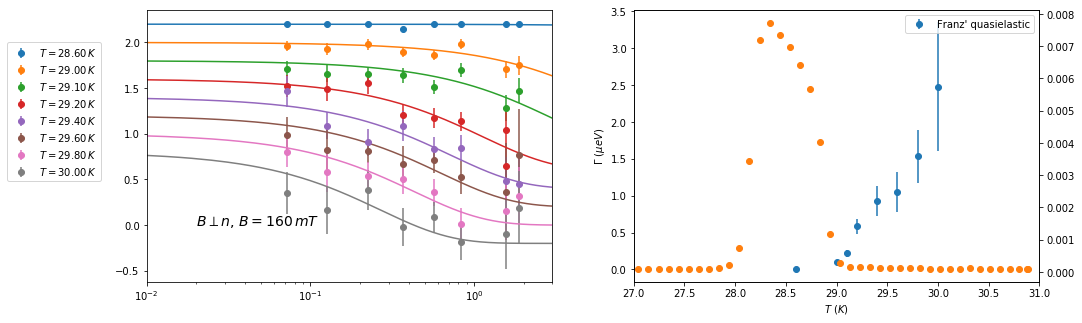

In [17]:
############################################
#see what hapens
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.constants as co
from matplotlib.colors import Colormap, LogNorm
from matplotlib.cm import get_cmap
import pandas as pd
%matplotlib inline
fig = plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,2,1)

Ts = []
Gammas = []
Gammaerrs = []

index = 0

def get_color(n, number_of_colors, cmapstr):

    cmap = get_cmap(cmapstr)

    return cmap(float(n)/number_of_colors)

print(parallel_result['Select'])
for T in parallel_result['Select']:
    
    x           = parallel_result['Parameters'][T]['x']
    y           = parallel_result['Parameters'][T]['y']
    print(y)
    y_error     = parallel_result['Parameters'][T]['y_error']

    c = get_color(index,10,'tab10')
    ax.errorbar(
        x, 
        y+1.2-index*0.2,
        y_error, 
        fmt='o', 
        color=c,
        label='$T=%.2f\,K$' %T)
    x = np.linspace(0.01,3,1000)

    ax.plot(x, parallel_result['Curve'][T]+1.2-index*0.2, color=c)
    
    index += 1


ax.set_xscale('log')
ax.set_xlim(0.01,3)
ax.legend(bbox_to_anchor=(-0.1,0.9))
ax.text(2e-2, 0, r'$B \perp n$, $B=160\,mT$', fontsize=14)


ax1 = fig.add_subplot(1,2,2)
c = get_color(0,10,'tab10')
ax1.errorbar(
    parallel_result['Select'],
    parallel_result['Gamma'],
    parallel_result['Gamma_error'],
    fmt='o', color=c, label='Franz\' quasielastic')

ax1.set_ylabel(r'$\Gamma\ (\mu eV)$')
ax1.set_xlabel(r'$T\ (K)$')
ax1.set_xlim(27,31)
ax1.legend()

ax2 = ax1.twinx()
c = get_color(1, 10, 'tab10')
ax2.errorbar(
    elastic_result_2['Axis']['110_1'], 
    elastic_result_2['Intensity']['110_1'], 
    yerr=elastic_result_2['Intensity_error']['110_1'], 
    fmt='o', color=c, label='Franz\' elastic')

#load Jonas' data
#Jdata = pd.read_csv('data/Kindervater_Bparan_quasielastic', skiprows=6, names=['T1', 'Gamma'])
#c = get_color(0, 10, 'tab10')
#ax1.errorbar(Jdata['T1']+0.4, Jdata['Gamma'], fmt='s', mec=c, mew=2, label='Jonas\' elastic', color='None')

#Jdata = pd.read_csv('data/Kindervater_Bparan_intensity', skiprows=6, names=['T2', 'Int'])
#c = get_color(1, 10, 'tab10')
#ax2.errorbar(Jdata['T2']+0.4, Jdata['Int']/(44*3), fmt='s', mec=c, mew=2, label='Jonas\' quasielastic', color='None')
plt.savefig('B_parallel_n.pdf')